<a href="https://colab.research.google.com/github/sadiaaliyeva7/programming--questions/blob/main/part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(data_id = 554, as_frame = False)

In [4]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
X = mnist['data']
y = mnist['target']

In [6]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [7]:
X[0].shape

(784,)

In [8]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [9]:
X.shape

(70000, 784)

In [10]:
print(X[0].reshape(28, 28))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

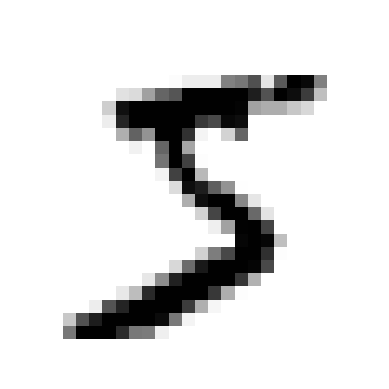

In [11]:
import matplotlib.pyplot as plt

def digit_image(num_image):
  num_image_reshaped = num_image.reshape(28, 28)
  plt.imshow(num_image_reshaped, cmap = 'binary')
  plt.axis('off')


some_digit = X[0]
digit_image(some_digit)

In [12]:
y[0]

'5'

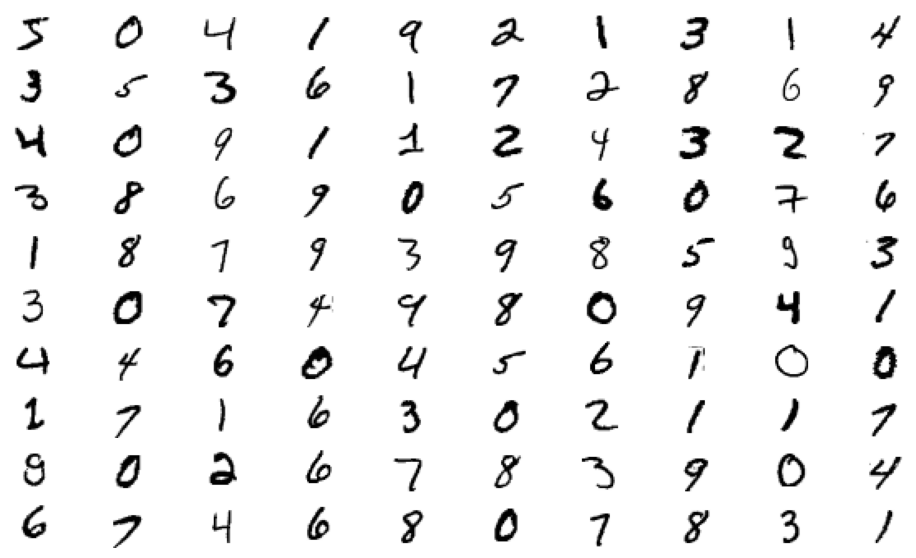

In [13]:
plt.figure(figsize= (12,7))
for idx, image in enumerate(X[:100]):
  plt.subplot(10,10, idx+1)
  digit_image(image)


In [14]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [15]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [16]:
y_train == 5

array([False, False, False, ..., False, False, False])

In [17]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score


In [19]:
sgd_clf = SGDClassifier(random_state = 42)

In [20]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [21]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3)


array([0.95035, 0.96035, 0.9604 ])

In [22]:
t = [0.95035, 0.96035, 0.9604]
np.mean(t)

np.float64(0.9570333333333334)

In [23]:
sgd_clf.score(X_test, y_test_5)

0.9492

In [24]:
sgd_clf.predict([some_digit])

array([ True])

In [25]:
1 - (sum(y_train == '5' ) / len(y_train))

np.float64(0.90965)

In [26]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [27]:
dummy_clf.score(X_train, y_train_5)

0.90965

In [28]:
len(y_train_5) - sum(y_train_5)

np.int64(54579)

In [29]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3)

array([0.90965, 0.90965, 0.90965])

In [ ]:
from sklearn.model_selection import